<a href="https://colab.research.google.com/github/RemyaRS/Machine_Learning_Case_Studies/blob/main/ML3_Phishing_Domain_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#for complex mathematical operations
import numpy as np 

#for dataframe manipulation 
import pandas as pd

# for data visulisation
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

Phishing - cyber security attack, where an attacker tries to obtain sensitive information from the victim. Usually, these kinds of attacks are done via emails, text messages, or websites.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Link of Dataset
https://data.mendeley.com/datasets/72ptz43s9v/1

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/phishing_full.csv")

Dataframe is a data structure having some rows and coloumns

Coloumns of dataframe may have data of different datatypes

Shape of dataset tells the number of rows and coloumns

In [ ]:
print("Shape of Dataset:" , data.shape)

Shape of Dataset: (88647, 112)


In [ ]:
data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,...,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,...,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,...,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,...,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0,0


#DATASET CLEANING

In [ ]:
#Since missing values should not be present for a better machine learning ...find the missing value is present or not
data.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [ ]:
data.dtypes

qty_dot_url             int64
qty_hyphen_url          int64
qty_underline_url       int64
qty_slash_url           int64
qty_questionmark_url    int64
                        ...  
qty_redirects           int64
url_google_index        int64
domain_google_index     int64
url_shortened           int64
phishing                int64
Length: 112, dtype: object

No missing values present

In [ ]:
data['phishing'].value_counts()

0    58000
1    30647
Name: phishing, dtype: int64

#Feature Engineering

###Splitting Test and Train Data

In [ ]:
x = data.drop("phishing",axis=1)   #Feature Matrix
y = data["phishing"] 

###To Identify the Multicorrelating Variables

In [ ]:
def correlation(data, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(x, 0.7)
len(set(corr_features))

54

In [ ]:
x=x.drop(corr_features,axis=1)

In [ ]:
print("Number of rows and coloumns in x:" , x.shape)

Number of rows and coloumns in x: (88647, 57)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(x)
x = pca.transform(x)
x.shape

(88647, 10)

###Separating Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
print("The shape of x train : ", x_train.shape)
print("The shape of x test : ", x_test.shape)
print("The shape of y train : ", y_train.shape)
print("The shape of y test : ", y_test.shape)

The shape of x train :  (62052, 10)
The shape of x test :  (26595, 10)
The shape of y train :  (62052,)
The shape of y test :  (26595,)


Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Importing confusion_matrix, accuracy_score, classification_report from sklearn.metrics library to obtain confusion matrix, accuracy score and classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_score,f1_score,recall_score

#Model Building

###Logistic Regression

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
# Specifiy the model
LG= LogisticRegression(C = 1e08) #Choose c as large
# fit the model 
LG.fit(x_train, y_train)
#predicting the labels for the samples
y_test_LG = LG.predict(x_test)
y_train_LG = LG.predict(x_train)

###Decision Tree Classifier

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# forming the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(x_train, y_train)
#predicting the labels for the samples
y_test_tree = tree.predict(x_test)
y_train_tree = tree.predict(x_train)

###Naive Bayes Classifier

In [ ]:
#Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB
# forming the model 
NB = GaussianNB()
# fit the model 
NB.fit(x_train, y_train)
#predicting the labels for the samples
y_test_NB = NB.predict(x_test)
y_train_NB = NB.predict(x_train)

###Random Forest model

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
# instantiate the model
forest = RandomForestClassifier(max_depth=5)
# fit the model 
forest.fit(x_train, y_train)
#predicting the target value from the model for the samples
y_test_forest = forest.predict(x_test)
y_train_forest = forest.predict(x_train)

###XGBoost Classification model

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier
# form the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(x_train, y_train)
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(x_test)
y_train_xgb = xgb.predict(x_train)

#Model Testing

##Computing accuracy of different models

In [ ]:
#Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [ ]:
#computing the accuracy of the model performance
acc_train_NB = accuracy_score(y_train,y_train_NB)
acc_test_NB = accuracy_score(y_test,y_test_NB)
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Naive Bayes', acc_train_NB, acc_test_NB)

In [ ]:
#computing the accuracy of the model performance
acc_train_LG = accuracy_score(y_train,y_train_LG)
acc_test_LG = accuracy_score(y_test,y_test_LG)
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Logistic Regression', acc_train_LG, acc_test_LG)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)
#computing the accuracy of the model performance
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [ ]:
#creating dataframe for accuracy
accuracy_results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})

##Computing precision of different models

In [ ]:
#Creating holders to store the model performance results
ML_Model = []
pre_train = []
pre_test = []

#function to call for storing the results
def storePrecision(model, p,q):
  ML_Model.append(model)
  pre_train.append(round(p, 3))
  pre_test.append(round(q, 3))

In [ ]:
#computing the precision of the model Random Forest
pre_train_forest = precision_score(y_train,y_train_forest)
pre_test_forest = precision_score(y_test,y_test_forest)
#storing the results. The below mentioned order of parameter passing is important.
storePrecision('Random Forest', pre_train_forest, pre_test_forest)

In [ ]:
#computing the precision of the model Naive Bayes
pre_train_NB = precision_score(y_train,y_train_NB)
pre_test_NB = precision_score(y_test,y_test_NB)
#storing the results. The below mentioned order of parameter passing is important.
storePrecision('Naive Bayes', pre_train_NB, pre_test_NB)

In [ ]:
#computing the precision of the model Logistic Regression
pre_train_LG = precision_score(y_train,y_train_LG)
pre_test_LG = precision_score(y_test,y_test_LG)
#storing the results. The below mentioned order of parameter passing is important.
storePrecision('Logistic Regression', pre_train_LG, pre_test_LG)

In [ ]:
#computing the precision of the model Decision Tree
pre_train_tree = precision_score(y_train,y_train_tree)
pre_test_tree = precision_score(y_test,y_test_tree)
#storing the results. The below mentioned order of parameter passing is important.
storePrecision('Decision Tree', pre_train_tree, pre_test_tree)

In [ ]:
#computing the precision of the model XGBoost
pre_train_xgb = precision_score(y_train,y_train_xgb)
pre_test_xgb = precision_score(y_test,y_test_xgb)
#storing the results. The below mentioned order of parameter passing is important.
storePrecision('XGBoost', pre_train_xgb, pre_test_xgb)

In [ ]:
#creating dataframe for precision
precision_results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Precision': pre_train,
    'Test Precision': pre_test})

##Computing recall of different models

In [ ]:
#Creating holders to store the model performance results
ML_Model = []
re_train = []
re_test = []

#function to call for storing the results
def storeRecall(model, m,n):
  ML_Model.append(model)
  re_train.append(round(m, 3))
  re_test.append(round(n, 3))

In [ ]:
#computing the recall of the model Random Forest
re_train_forest = recall_score(y_train,y_train_forest)
re_test_forest = recall_score(y_test,y_test_forest)
#storing the results. The below mentioned order of parameter passing is important.
storeRecall('Random Forest', re_train_forest, re_test_forest)

In [ ]:
#computing the recall of the model Naive Bayes
re_train_NB = recall_score(y_train,y_train_NB)
re_test_NB = recall_score(y_test,y_test_NB)
#storing the results. The below mentioned order of parameter passing is important.
storeRecall('Naive Bayes', re_train_NB, re_test_NB)

In [ ]:
#computing the recall of the model Logistic Regression
re_train_LG = recall_score(y_train,y_train_LG)
re_test_LG = recall_score(y_test,y_test_LG)
#storing the results. The below mentioned order of parameter passing is important.
storeRecall('Logistic Regression', re_train_LG, pre_test_LG)

In [ ]:
#computing the precision of the model Decision Tree
re_train_tree = recall_score(y_train,y_train_tree)
re_test_tree = recall_score(y_test,y_test_tree)
#storing the results. The below mentioned order of parameter passing is important.
storeRecall('Decision Tree', re_train_tree, re_test_tree)

In [ ]:
#computing the recall of the model XGBoost
re_train_xgb = recall_score(y_train,y_train_xgb)
re_test_xgb = recall_score(y_test,y_test_xgb)
#storing the results. The below mentioned order of parameter passing is important.
storeRecall('XGBoost', re_train_xgb, re_test_xgb)

In [ ]:
#creating dataframe for recall
recall_results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Recall': re_train,
    'Test Recall': re_test})

##Computing f1 Score of different models

In [ ]:
#Creating holders to store the model performance results
ML_Model = []
f1_train = []
f1_test = []

#function to call for storing the results
def storef1(model, r,s):
  ML_Model.append(model)
  f1_train.append(round(r, 3))
  f1_test.append(round(s, 3))

In [ ]:
#computing the f1 score of the model Random Forest
f1_train_forest = f1_score(y_train,y_train_forest)
f1_test_forest = f1_score(y_test,y_test_forest)
#storing the results. The below mentioned order of parameter passing is important.
storef1('Random Forest', f1_train_forest, f1_test_forest)

In [ ]:
#computing the f1 score of the model Naive Bayes
f1_train_NB = f1_score(y_train,y_train_NB)
f1_test_NB = f1_score(y_test,y_test_NB)
#storing the results. The below mentioned order of parameter passing is important.
storef1('Naive Bayes', f1_train_NB, f1_test_NB)

In [ ]:
#computing the f1 score of the model Logistic Regression
f1_train_LG = f1_score(y_train,y_train_LG)
f1_test_LG = f1_score(y_test,y_test_LG)
#storing the results. The below mentioned order of parameter passing is important.
storef1('Logistic Regression', f1_train_LG, f1_test_LG)

In [ ]:
#computing the f1 score of the model Decision Tree
f1_train_tree = f1_score(y_train,y_train_tree)
f1_test_tree = f1_score(y_test,y_test_tree)
#storing the results. The below mentioned order of parameter passing is important.
storef1('Decision Tree', f1_train_tree, f1_test_tree)

In [ ]:
#computing the f1 score of the model XGBoost
f1_train_xgb = f1_score(y_train,y_train_xgb)
f1_test_xgb = f1_score(y_test,y_test_xgb)
#storing the results. The below mentioned order of parameter passing is important.
storef1('XGBoost', f1_train_xgb, f1_test_xgb)

In [ ]:
#creating dataframe for f1 score
f1_results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train f1 score': f1_train,
    'Test f1 score': f1_test})

##Confusion Matrix

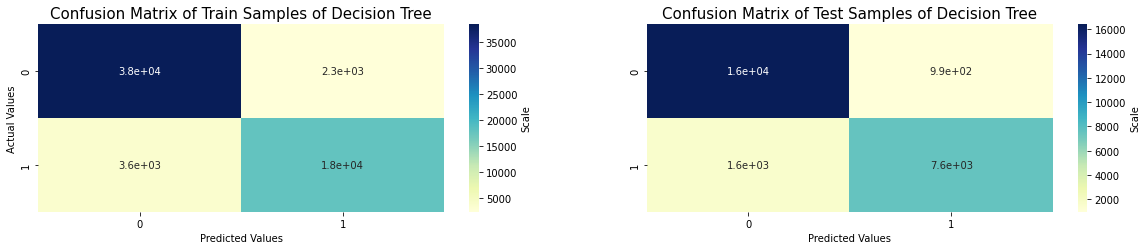

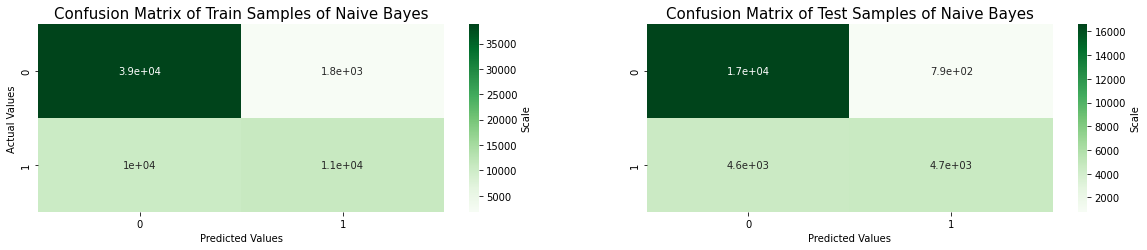

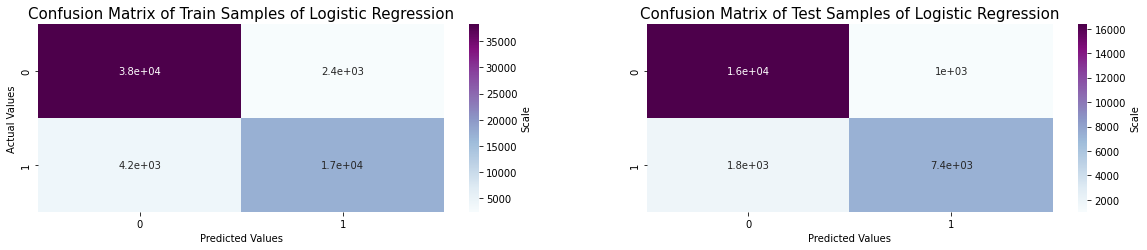

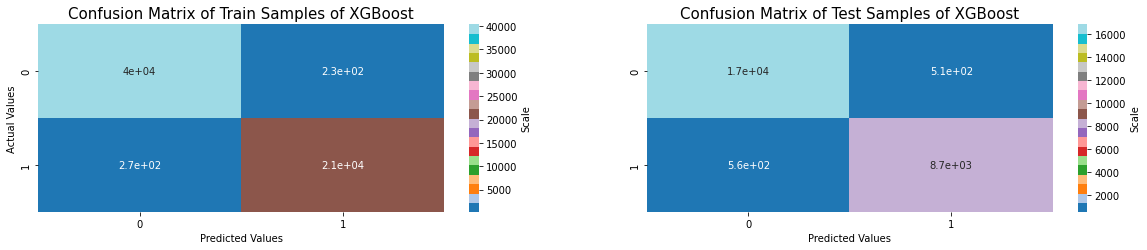

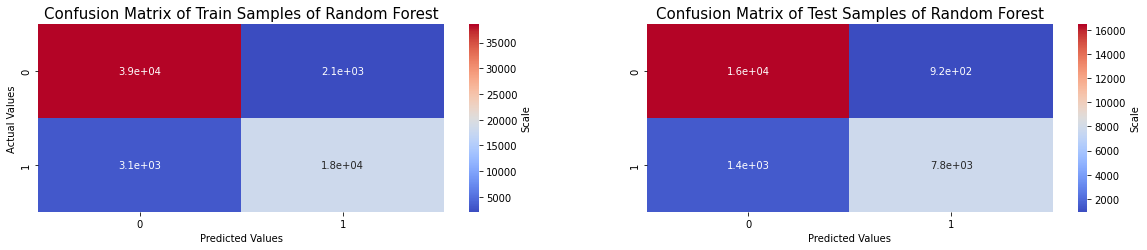

In [ ]:
#To print confusion matrix
plt.rcParams["figure.figsize"]=(20,20)
cm_tree_train=confusion_matrix(y_train,y_train_tree)
cm_tree_test=confusion_matrix(y_test,y_test_tree)
#sns.heatmap(cm, annot=True, cmap='Wistia')
plt.subplot(5, 2, 1)
sns.heatmap(cm_tree_train, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
plt.title("Confusion Matrix of Train Samples of Decision Tree", fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.subplot(5, 2, 2)
sns.heatmap(cm_tree_test, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
plt.title("Confusion Matrix of Test Samples of Decision Tree", fontsize=15)
plt.xlabel('Predicted Values')
plt.xlabel('Predicted Values')
plt.show()

cm_NB_train=confusion_matrix(y_train,y_train_NB)
cm_NB_test=confusion_matrix(y_test,y_test_NB)
#sns.heatmap(cm, annot=True, cmap='Wistia')
plt.subplot(5, 2, 3)
sns.heatmap(cm_NB_train, annot=True, cmap="Greens", cbar_kws={'label': 'Scale'})
plt.title("Confusion Matrix of Train Samples of Naive Bayes", fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.subplot(5, 2, 4)
sns.heatmap(cm_NB_test, annot=True, cmap="Greens", cbar_kws={'label': 'Scale'})
plt.title("Confusion Matrix of Test Samples of Naive Bayes", fontsize=15)
plt.xlabel('Predicted Values')
plt.xlabel('Predicted Values')
plt.show()

cm_LG_train=confusion_matrix(y_train,y_train_LG)
cm_LG_test=confusion_matrix(y_test,y_test_LG)
#sns.heatmap(cm, annot=True, cmap='Wistia')
plt.subplot(5, 2, 5)
sns.heatmap(cm_LG_train, annot=True, cmap="BuPu", cbar_kws={'label': 'Scale'})
plt.title("Confusion Matrix of Train Samples of Logistic Regression", fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.subplot(5, 2, 6)
sns.heatmap(cm_LG_test, annot=True, cmap="BuPu", cbar_kws={'label': 'Scale'})
plt.title("Confusion Matrix of Test Samples of Logistic Regression", fontsize=15)
plt.xlabel('Predicted Values')
plt.xlabel('Predicted Values')
plt.show()

cm_xgb_train=confusion_matrix(y_train,y_train_xgb)
cm_xgb_test=confusion_matrix(y_test,y_test_xgb)
#sns.heatmap(cm, annot=True, cmap='Wistia')
plt.subplot(5, 2, 7)
sns.heatmap(cm_xgb_train, annot=True, cmap="tab20", cbar_kws={'label': 'Scale'})
plt.title("Confusion Matrix of Train Samples of XGBoost", fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.subplot(5, 2, 8)
sns.heatmap(cm_xgb_test, annot=True, cmap="tab20", cbar_kws={'label': 'Scale'})
plt.title("Confusion Matrix of Test Samples of XGBoost", fontsize=15)
plt.xlabel('Predicted Values')
plt.xlabel('Predicted Values')
plt.show()

cm_forest_train=confusion_matrix(y_train,y_train_forest)
cm_forest_test=confusion_matrix(y_test,y_test_forest)
#sns.heatmap(cm, annot=True, cmap='Wistia')
plt.subplot(5, 2, 7)
sns.heatmap(cm_forest_train, annot=True, cmap="coolwarm", cbar_kws={'label': 'Scale'})
plt.title("Confusion Matrix of Train Samples of Random Forest", fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.subplot(5, 2, 8)
sns.heatmap(cm_forest_test, annot=True, cmap="coolwarm", cbar_kws={'label': 'Scale'})
plt.title("Confusion Matrix of Test Samples of Random Forest", fontsize=15)
plt.xlabel('Predicted Values')
plt.xlabel('Predicted Values')
plt.show()

#Finding Model that is Best Fit

In [ ]:
accuracy_results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
4,XGBoost,0.992,0.960
3,Random Forest,0.916,0.912
2,Decision Tree,0.905,0.902
1,Logistic Regression,0.895,0.892
0,Naive Bayes,0.802,0.799


In [ ]:
precision_results.sort_values(by=['Test Precision', 'Train Precision'], ascending=False)

,ML Model,Train Precision,Test Precision
4,XGBoost,0.989,0.944
0,Random Forest,0.898,0.894
3,Decision Tree,0.886,0.885
2,Logistic Regression,0.879,0.878
1,Naive Bayes,0.857,0.855


In [ ]:
recall_results.sort_values(by=['Test Recall', 'Train Recall'], ascending=False)

,ML Model,Train Recall,Test Recall
4,XGBoost,0.987,0.940
2,Logistic Regression,0.806,0.878
0,Random Forest,0.854,0.847
3,Decision Tree,0.830,0.824
1,Naive Bayes,0.512,0.506


In [ ]:
f1_results.sort_values(by=['Test f1 score', 'Train f1 score'], ascending=False)

,ML Model,Train f1 score,Test f1 score
4,XGBoost,0.988,0.942
0,Random Forest,0.875,0.870
3,Decision Tree,0.857,0.853
2,Logistic Regression,0.841,0.837
1,Naive Bayes,0.641,0.636


#XGBoost Shows Best Results